# Computação quântica

## Matrizes

Definir as matrizes que vão ser usadas.

{{0, 1}, {1, 0}}
{{0, -I}, {I, 0}}
{{1, 0}, {0, -1}}
     1        1          1          1
{{-------, -------}, {-------, -(-------)}}
  Sqrt[2]  Sqrt[2]    Sqrt[2]    Sqrt[2]
{{1, 0}, {0, I}}
              I/4 Pi
{{1, 0}, {0, E      }}
{{1, 0, 0, 0}, {0, 1, 0, 0}, {0, 0, 0, 1}, {0, 0, 1, 0}}
{{1, 0, 0, 0}, {0, 1, 0, 0}, {0, 0, 1, 0}, {0, 0, 0, -1}}
{{1, 0, 0, 0}, {0, 0, 1, 0}, {0, 1, 0, 0}, {0, 0, 0, 1}}
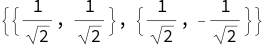
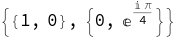

In [8]:
x={{0,1},{1,0}} 
y={{0,-I},{I,0}}
z={{1,0},{0,-1}}
h=1/(Sqrt[2]){{1,1},{1,-1}}
s={{1,0},{0,I}}
t={{1,0},{0,E^(I*Pi/4)}}
cnot={{1,0,0,0},{0,1,0,0},{0,0,0,1},{0,0,1,0}}
cz={{1,0,0,0},{0,1,0,0},{0,0,1,0},{0,0,0,-1}}
sphase[m_]:={{1,0},{0,E^(I*m)}}
cphase[m_]:={{1,0,0,0},{0,1,0,0},{0,0,1,0},{0,0,0,E^(I*m)}}
swap={{1,0,0,0},{0,0,1,0},{0,1,0,0},{0,0,0,1}}

## Exercicio 1

Para calcular o estado final de um qubit temos que ter em consideração as transformações ao longo do caminho ou seja, $ |\psi_f>=\hat{M_t}|\psi_i>
$, onde $\hat{M_t}$ é a matriz total.
Para este exercicio, $\hat{M_t}=X.H.Z$, entao $|\psi_f>=X.H.Z|\psi_i> $

{a, b}
    a         b        a         b
{------- + -------, ------- - -------}
 Sqrt[2]   Sqrt[2]  Sqrt[2]   Sqrt[2]
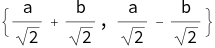

In [69]:
psi={a,b}
psif=x.h.z.psi

## Exercicio 2

As transformações são equivalentes quando as matrizes são iguais.

{{1, 0}, {0, -1}}
{{1, 0}, {0, -1}}
True
{{1, 0}, {0, I}}
{{1, 0}, {0, I}}
True
{{0, -I}, {I, 0}}
{{0, -I}, {I, 0}}
True
              (-(1/4) I) Pi
{{1, 0}, {0, E             }}
                 I/4 Pi
{{1, 0}, {0, -I E      }}
True
{{1, 0}, {0, -I}}
{{1, 0}, {0, -I}}
True
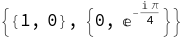
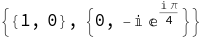

In [59]:
z
h.x.h
If[z==h.x.h,True,False]

s
t.t
If[s==t.t,True,False]

y
x.s.x.s.x.z
If[y==x.s.x.s.x.z,True,False]

ConjugateTranspose[t]
t.s.s.s
If[ConjugateTranspose[t]==t.s.s.s,True,False]

ConjugateTranspose[s]
s.s.s
If[ConjugateTranspose[s]==s.s.s,True,False]

## Exercicio 3

Em circuitos de 2 ou mais particulas é conveniente representar as matrizes na base das particulas, por exemplo a matriz hadamard, $H$, que esta representada na base de uma particula, para uma base de duas particulas fica, $\hat{H_1}=H \otimes I$, que aplica na 1ª particula e $\hat{H_2}=I \otimes H$, que aplica na 2ª particula.

Quando um Gate esta invertido é conveniente aplicar a matriz SWAP, para alterar a posição das duas particulas e ter o Gate nao invertido e depois aplicar a matriz SWAP novamente, para retumar as posicoes das duas particulas.

1           1                1           1          1             1
{{-------, 0, -------, 0}, {0, -------, 0, -------}, {-------, 0, -(-------), 0}, 
  Sqrt[2]     Sqrt[2]          Sqrt[2]     Sqrt[2]    Sqrt[2]       Sqrt[2]
 
           1             1
>   {0, -------, 0, -(-------)}}
        Sqrt[2]       Sqrt[2]
     1        1                1          1                       1        1
{{-------, -------, 0, 0}, {-------, -(-------), 0, 0}, {0, 0, -------, -------}, 
  Sqrt[2]  Sqrt[2]          Sqrt[2]    Sqrt[2]                 Sqrt[2]  Sqrt[2]
 
              1          1
>   {0, 0, -------, -(-------)}}
           Sqrt[2]    Sqrt[2]
{{1, 0, 0, 0}, {0, 0, 0, 1}, {0, 0, 1, 0}, {0, 1, 0, 0}}
{{1, 0, 0, 0}, {0, 0, 0, 1}, {0, 0, 1, 0}, {0, 1, 0, 0}}
True
{{1, 0, 0, 0}, {0, 1, 0, 0}, {0, 0, 1, 0}, {0, 0, 0, -1}}
{{1, 0, 0, 0}, {0, 1, 0, 0}, {0, 0, 1, 0}, {0, 0, 0, -1}}
True
{{1, 0, 0, 0}, {0, 1, 0, 0}, {0, 0, 1, 0}, {0, 0, 0, -1}}
{{1, 0, 0, 0}, {0, 1, 0, 0}, {0, 0, 1, 0}, {0, 0, 0, -1}}
True
{{1, 0, 0, 0}, {0, 1, 0, 0}, {0, 0, 0, 1}, {0, 0, 1, 0}}
{{1, 0, 0, 0}, {0, 1, 0, 0}, {0, 0, 0, 1}, {0, 0, 1, 0}}
True
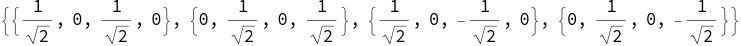
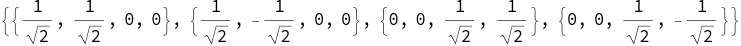

In [86]:
h1=KroneckerProduct[h,IdentityMatrix[2]] 
h2=KroneckerProduct[IdentityMatrix[2],h] 
psif1=h1.h2.cnot.h1.h2
psif2=swap.cnot.swap
If[psif1==psif2,True,False]

cz
swap.cz.swap
If[cz==swap.cz.swap,True,False]

cphase[Pi]
h2.cnot.h2
If[cphase[Pi]==h2.cnot.h2,True,False]

cnot
h2.cphase[Pi].h2
If[cnot==h2.cphase[Pi].h2,True,False]

## Exercicio 4

Seguindo a mesma lógica de mudanças de base do exercicio anterior, agora é necessario usar a matriz de mudança de fase, e ter em conta a ordem do circuito.

In [100]:
sphase1[m_]:=KroneckerProduct[sphase[m],IdentityMatrix[2]]
sphase2[m_]:=KroneckerProduct[IdentityMatrix[2],sphase[m]]

cphase[m]
sphase1[m/2].cnot.sphase2[-m/2].cnot.sphase2[m/2]
If[cphase[m]==sphase1[m/2].cnot.sphase2[-m/2].cnot.sphase2[m/2],True,False]

I m
{{1, 0, 0, 0}, {0, 1, 0, 0}, {0, 0, 1, 0}, {0, 0, 0, E   }}
                                                      I m
{{1, 0, 0, 0}, {0, 1, 0, 0}, {0, 0, 1, 0}, {0, 0, 0, E   }}
True

## Exercicio 5

1   0   0   0

0   0   1   0

0   0   0   1

0   1   0   0
   1                         1
-------                   -------
Sqrt[2]      0            Sqrt[2]      0

                1                         1
             -------                   -------
0            Sqrt[2]      0            Sqrt[2]

                1                           1
             -------                   -(-------)
0            Sqrt[2]      0              Sqrt[2]

   1                           1
-------                   -(-------)
Sqrt[2]      0              Sqrt[2]    0
   1                                      1
-------                                -------
Sqrt[2]      0            0            Sqrt[2]

                1            1
             -------      -------
0            Sqrt[2]      Sqrt[2]      0

   1                                        1
-------                                -(-------)
Sqrt[2]      0            0              Sqrt[2]

                1              1
             -------      -(-------)
0            Sqrt[2]        Sqrt[2]    0
   1                         1
-------                   -------
Sqrt[2]      0            Sqrt[2]      0

                1                           1
             -------                   -(-------)
0            Sqrt[2]      0              Sqrt[2]

   1                           1
-------                   -(-------)
Sqrt[2]      0              Sqrt[2]    0

                1                         1
             -------                   -------
0            Sqrt[2]      0            Sqrt[2]
   1                         1
-------                   -------
Sqrt[2]      0            Sqrt[2]      0

                1                         1
             -------                   -------
0            Sqrt[2]      0            Sqrt[2]

   1                           1
-------                   -(-------)
Sqrt[2]      0              Sqrt[2]    0

                  1                       1
             -(-------)                -------
0              Sqrt[2]    0            Sqrt[2]
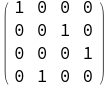
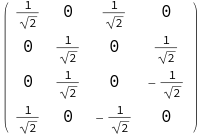
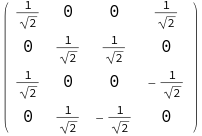
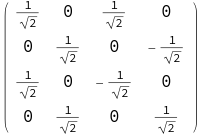
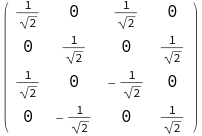

In [35]:
swap.cnot.swap.cnot //MatrixForm
cnot.h1 //MatrixForm
h1.cnot //MatrixForm
swap.cnot.swap.h1 //MatrixForm
h1.swap.cnot.swap //MatrixForm

## Exercicio 6

In [40]:
If[cphase[Pi]==h2.cnot.h2,True,False]
If[cnot==h2.cphase[Pi].h2,True,False]

True
True